In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


In [14]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [16]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 9.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLTK for NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# WordCloud
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

# scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
train_path = '/kaggle/input/emotions-dataset-for-nlp/train.txt'

df_train=pd.read_csv(train_path,sep=';',header=None,names=['text','emotion'])
print(df_train.head())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [55]:
test_path='/kaggle/input/emotions-dataset-for-nlp/val.txt'
df_val=pd.read_csv(test_path,sep=';',header=None,names=['text','emotion'])
df_val.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [56]:
df_train.size

32000

In [57]:
df_val.size

4000

In [58]:
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
df.shape

(18000, 2)

In [59]:
df.sample(5)

,text,emotion
3609,i also feel that no one in the music school is...,love
1906,i am much lighter now i feel extremely passion...,love
8222,i always jumble words and letters and i feel l...,sadness
16992,i feel unimportant and small here lately,sadness
12162,i feel that i am neither of those two types i ...,love


In [60]:
df.emotion.nunique()

6

In [61]:
df.emotion.value_counts()

emotion
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

<BarContainer object of 6 artists>

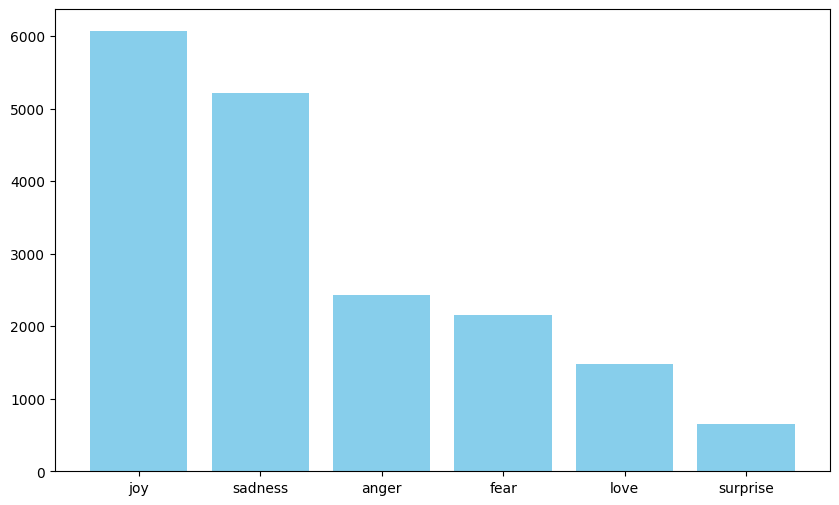

In [62]:
emotion_counts = df['emotion'].value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')

In [63]:
# positive sentiment - love , joy , surprise - 1
#negaitve sentiment - anger , sadness , fear - 0

In [77]:
df['emotion'] = df['emotion'].replace(['love','joy','surprise'], 1)
df['emotion'] = df['emotion'].replace(['anger', 'sadness', 'fear'], 0)


<BarContainer object of 2 artists>

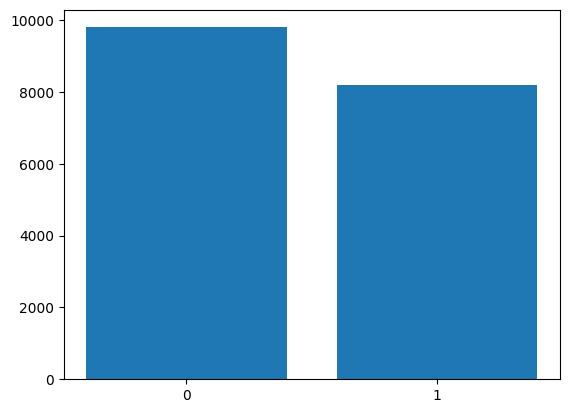

In [78]:
plt.bar(df['emotion'].value_counts().index.astype(str),df['emotion'].value_counts().values)

In [79]:
# df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower().str.strip()


In [80]:

lm = WordNetLemmatizer()  # there are many other lemmatizers 
stop_words = set(stopwords.words('english'))  # correct method to get stopwords set

def transformation(df_column):
    output = []
    for i in df_column:
        # Fix regex by enclosing pattern in quotes
        new_text = re.sub(r'[^a-zA-Z]', ' ', str(i))  # keep only letters, replace others by space
        new_text = new_text.lower()
        new_text = new_text.split()
        
        # Lemmatize and remove stopwords
        new_text = [lm.lemmatize(j) for j in new_text if j not in stop_words]
        
        # Join back into string
        output.append(' '.join(new_text))
    return output


In [81]:
var=transformation(df.text)

In [82]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

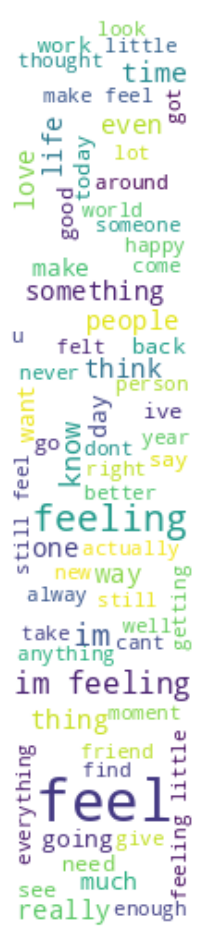

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences into a single string
word = ' '.join(var)

# Generate the word cloud
wc = WordCloud(width=100, height=500, background_color='white', min_font_size=10).generate(word)

# Plot the word cloud
plt.figure(figsize=(28, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


In [84]:
# Bag of words model

cv = CountVectorizer(ngram_range=(1, 2))
traindata = cv.fit_transform(var)
X_train = traindata
Y_train = df['emotion']


In [85]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 311217 stored elements and shape (18000, 117602)>

In [86]:
model=RandomForestClassifier()

In [87]:
parameters = {
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],  # Correct spelling here
    'n_estimators': [50, 100, 200],
    
}


In [88]:
parameters

{'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200]}

In [ ]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=5,
                           return_train_score=True,
                           n_jobs=1)

grid_search.fit(X_train, Y_train)

In [89]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [92]:
# rfc=RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
#                           n_estimators=grid_search.best_params_['n_estimators']
#                           ,max_depth=grid_search.best_params_['max_depth'],
#                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
#                           min_samples_split=grid_search.best_params_['min_samples_split'],
#                           bootstrap=grid_search.best_params_['bootstrap'])

# ////////////  The Grid Search was taking time so i directly used the parameters  /////////////////////

rfc = RandomForestClassifier(
    max_features='sqrt',
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True
)


In [93]:
rfc.fit(X_train,Y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
test_path = '/kaggle/input/emotions-dataset-for-nlp/test.txt'
df_test = pd.read_csv(test_path, sep=';', header=None, names=['text', 'emotion'])

In [97]:
df_test.head

<bound method NDFrame.head of                                                    text  emotion
0     im feeling rather rotten so im not very ambiti...  sadness
1             im updating my blog because i feel shitty  sadness
2     i never make her separate from me because i do...  sadness
3     i left with my bouquet of red and yellow tulip...      joy
4       i was feeling a little vain when i did this one  sadness
...                                                 ...      ...
1995  i just keep feeling like someone is being unki...    anger
1996  im feeling a little cranky negative after this...    anger
1997  i feel that i am useful to my people and that ...      joy
1998  im feeling more comfortable with derby i feel ...      joy
1999  i feel all weird when i have to meet w people ...     fear

[2000 rows x 2 columns]>

In [103]:
positive_emotions = ['love', 'joy', 'surprise']

X_test = cv.transform(df_test['text'])
y_test = df_test['emotion'].apply(lambda x: 1 if x in positive_emotions else 0)

y_pred = rfc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1080
           1       0.96      0.96      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [104]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download nltk assets if not already done
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize preprocessing tools
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function (adapt this if your training preprocessing was different)
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower().strip()
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lm.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

# List of positive emotions for mapping back if needed
positive_emotions = ['love', 'joy', 'surprise']

def predict_emotion(user_text):
    # Preprocess user input
    clean_text = preprocess_text(user_text)
    
    # Vectorize user input using existing CountVectorizer
    vectorized_text = cv.transform([clean_text])
    
    # Predict using trained RandomForest model
    pred = rfc.predict(vectorized_text)[0]
    
    # Optional: map prediction back to descriptive label
    if pred == 1:
        label = 'Positive Emotion (love, joy, surprise)'
    else:
        label = 'Other Emotion (anger, sadness, fear, etc.)'
    
    return label

# Example interaction:
if __name__ == "__main__":
    user_input = input("Enter your text for emotion prediction:\n")
    result = predict_emotion(user_input)
    print(f"Predicted emotion category: {result}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Enter your text for emotion prediction:
 Today i am very happy because i have completed the model


Predicted emotion category: Positive Emotion (love, joy, surprise)
